In [91]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('Mall_Customers.csv')

In [44]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [46]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [47]:
df.shape

(200, 5)

In [48]:
df.isnull().values.any()

False

In [49]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Label Encoding

In [50]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [51]:
# df['gender'] = le.fit_transform(df['gender'])

In [52]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


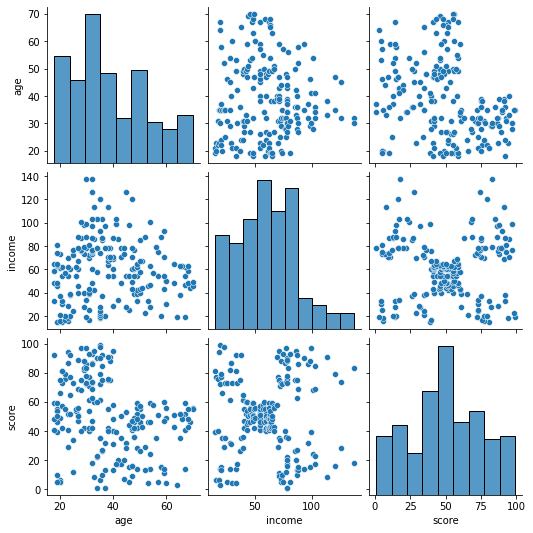

In [53]:
seaborn.pairplot(df[['age', 'income', 'gender', 'score']])

# K-Means Clustering

In [60]:
import sklearn.cluster as cluster

# Income Cluster

In [82]:
kmeans = cluster.KMeans(n_clusters=5)

In [65]:
kmeans.fit(df[['income', 'score']])

KMeans(n_clusters=5)

In [66]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [67]:
df['income_clusters'] = kmeans.labels_

In [68]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [70]:
df['income_clusters'].value_counts()

0    81
2    39
1    35
3    23
4    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

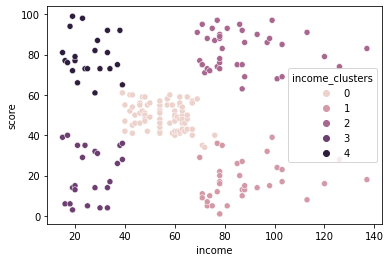

In [71]:
seaborn.scatterplot(x='income', y='score', hue='income_clusters', data=df)

# Age Cluster

In [84]:
kmeans = cluster.KMeans(n_clusters=2)

In [74]:
kmeans.fit(df[['age', 'score']])

KMeans(n_clusters=2)

In [75]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [76]:
df['age_clusters'] = kmeans.labels_

In [77]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,1,0


In [79]:
df['age_clusters'].value_counts()

0    115
1     85
Name: age_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

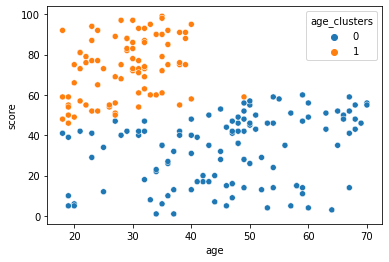

In [80]:
seaborn.scatterplot(x='age', y='score', hue='age_clusters', data=df)

# Elbow Method

In [88]:
# for income
k_range = range(1,12)
wcss = []

In [89]:
for k in k_range:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['income', 'score']])
    wcss.append(km.inertia_)

In [90]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25037.98550009965,
 22135.035074930453,
 19643.655552199743,
 17918.55066208147]

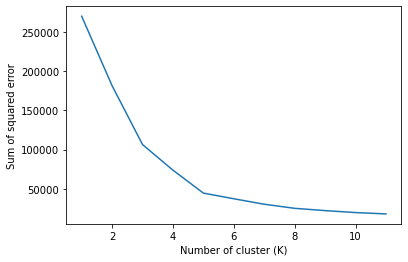

In [92]:
plt.xlabel('Number of cluster (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range, wcss)

In [93]:
# for age
k_range = range(1,12)
wcss = []

In [94]:
for k in k_range:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['age', 'score']])
    wcss.append(km.inertia_)

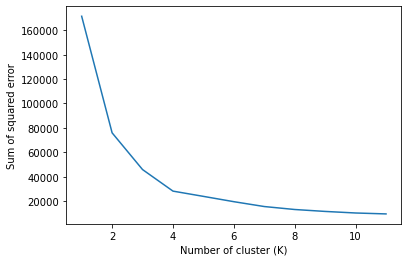

In [95]:
plt.xlabel('Number of cluster (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range, wcss)